# Part 1: Searching for and Downloading open fMRI datasets
*Created by Mengqiao Chai, Department of Experimental Psychology, Ghent University*

In this toturial, you will learn how to search for a well-documented and well-maintained Open fMRI dataset and download them from platforms such as [OpenNeuro](https://openneuro.org/) and [OSF](https://osf.io/) in preparation for further analysis.

## Searching for a dataset
Online data repositories, such as OpenNeuro and OSF, contain large amounts of open data, but not every dataset are well-documented and well-organized. Since fMRI analysis requires detailed information regarding data acquisition in order to perform the correct and appropriate analysis, poor documentation and organization would impede data re-usage. Thus, finding a well-maintained open dataset that can be used to address your research interest is the first key step.

To this aim, I find one publisher ([Scientific Data](https://www.nature.com/sdata/)) that publish open dataset with detailed documentation. As shown below, you could search key words and research field on their homepage and it will return a list of datasets that fullfil your requirements.

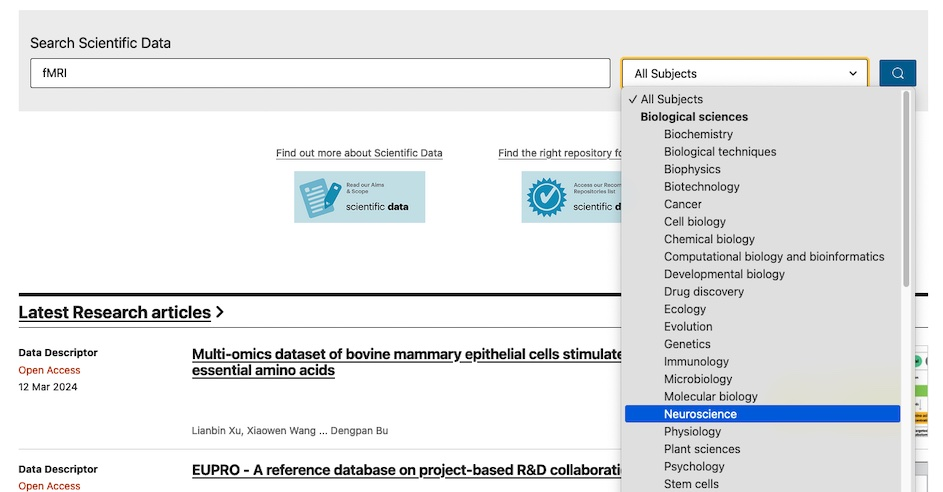

And here, I pre-selected several datasets that cover a range of research questions in Cognitive Neuroscience:\
[A within-subject fMRI study on cognitive control](https://www.nature.com/articles/s41597-022-01226-4)\
[A multimodal MRI datasets for individual differences](https://www.nature.com/articles/s41597-021-00870-6)\
[A multimodal dataset for emotion perception and judgment](https://www.nature.com/articles/s41597-023-02693-z)\
[An fMRI Dataset for Concept Representation](https://www.nature.com/articles/s41597-022-01840-2)\
Since these datasets already involved hundreds' of participants who performed on various cognitive tasks, they are comprehensive enough for you to explore different kinds of analysis possibilities. But they are merely sugguestions, feel free to search for other options!

## Downloading the dataset (partially)
Once you choose the dataset of interest, the next challenge is to download them onto your laptop. The datasets I listed above all have their data uploaded on either [OpenNeuro](https://openneuro.org/) and [OSF](https://osf.io/). In terms of datasets on OpenNeuro, you can find a OpenNeuro Accession Number(starts with "ds", such as ds003465) in their documentation, and search for this number on the [OpenNeuro website](https://openneuro.org/). For dataset published on OSF, normally there will be a OSF URL link that you can find in their documentation. By using that link, you can find corresponding dataset on OSF.

Here, to illustrate, I will show how to download the necessary data for a single-subject fMRI GLM analysis from the [DMCC](https://www.nature.com/articles/s41597-022-01226-4) project. In the datasets, 55 participants went through multiple sessions of anatomical and fMRI scanning, in which they were asked to perform multiple classical cognitive tasks, such as Stroop task and task switching. in this tutorial, we will only use the fMRI images of one functional run from one partipants for illustration purpose. And the images were already preprocessed, which is very handy to us since we can just analyze them directly!

Importantly, most of the public brain imaging datasets are organized in [BIDS](https://bids-specification.readthedocs.io/en/stable/) format, which stand for Brain Imaging Data Structure. By adopting this data structure, cognitive neuroscientists can share and reuse data easily. 

As you can see, when you open the **DMCC55B** dataset on OpenNeuro, the data is organized in a hierarchical manner following the BIDS format. There are several folders and files we need to pay attention to. First of all, data from each participants were put in separate folder based on their participant's ID (such as "sub-f1027ao"). Within the participant's folder, there are 3 sub-folders, each of which contains the anatomical images ("anat"), fieldmap images ("fmap"), and functional images ("func") respectively.

For the purpose of our tutorial, we only need the event file (with "events.tsv" as suffix) from the **func** folder for the GLM analysis. and we will only analyze the images acquired when participants performed the Stroop task. Thus, please locate the correponding files(with both "task-Stroop" and "events.tsv" in the file name). As you can see, there are two files, one for each functional run("run-1" and "run-2"). for each file, please click the "eye" icon on the right side of file first and then click "Download". Now, these files are downloaded on your own laptop. Pretty easy, right ?

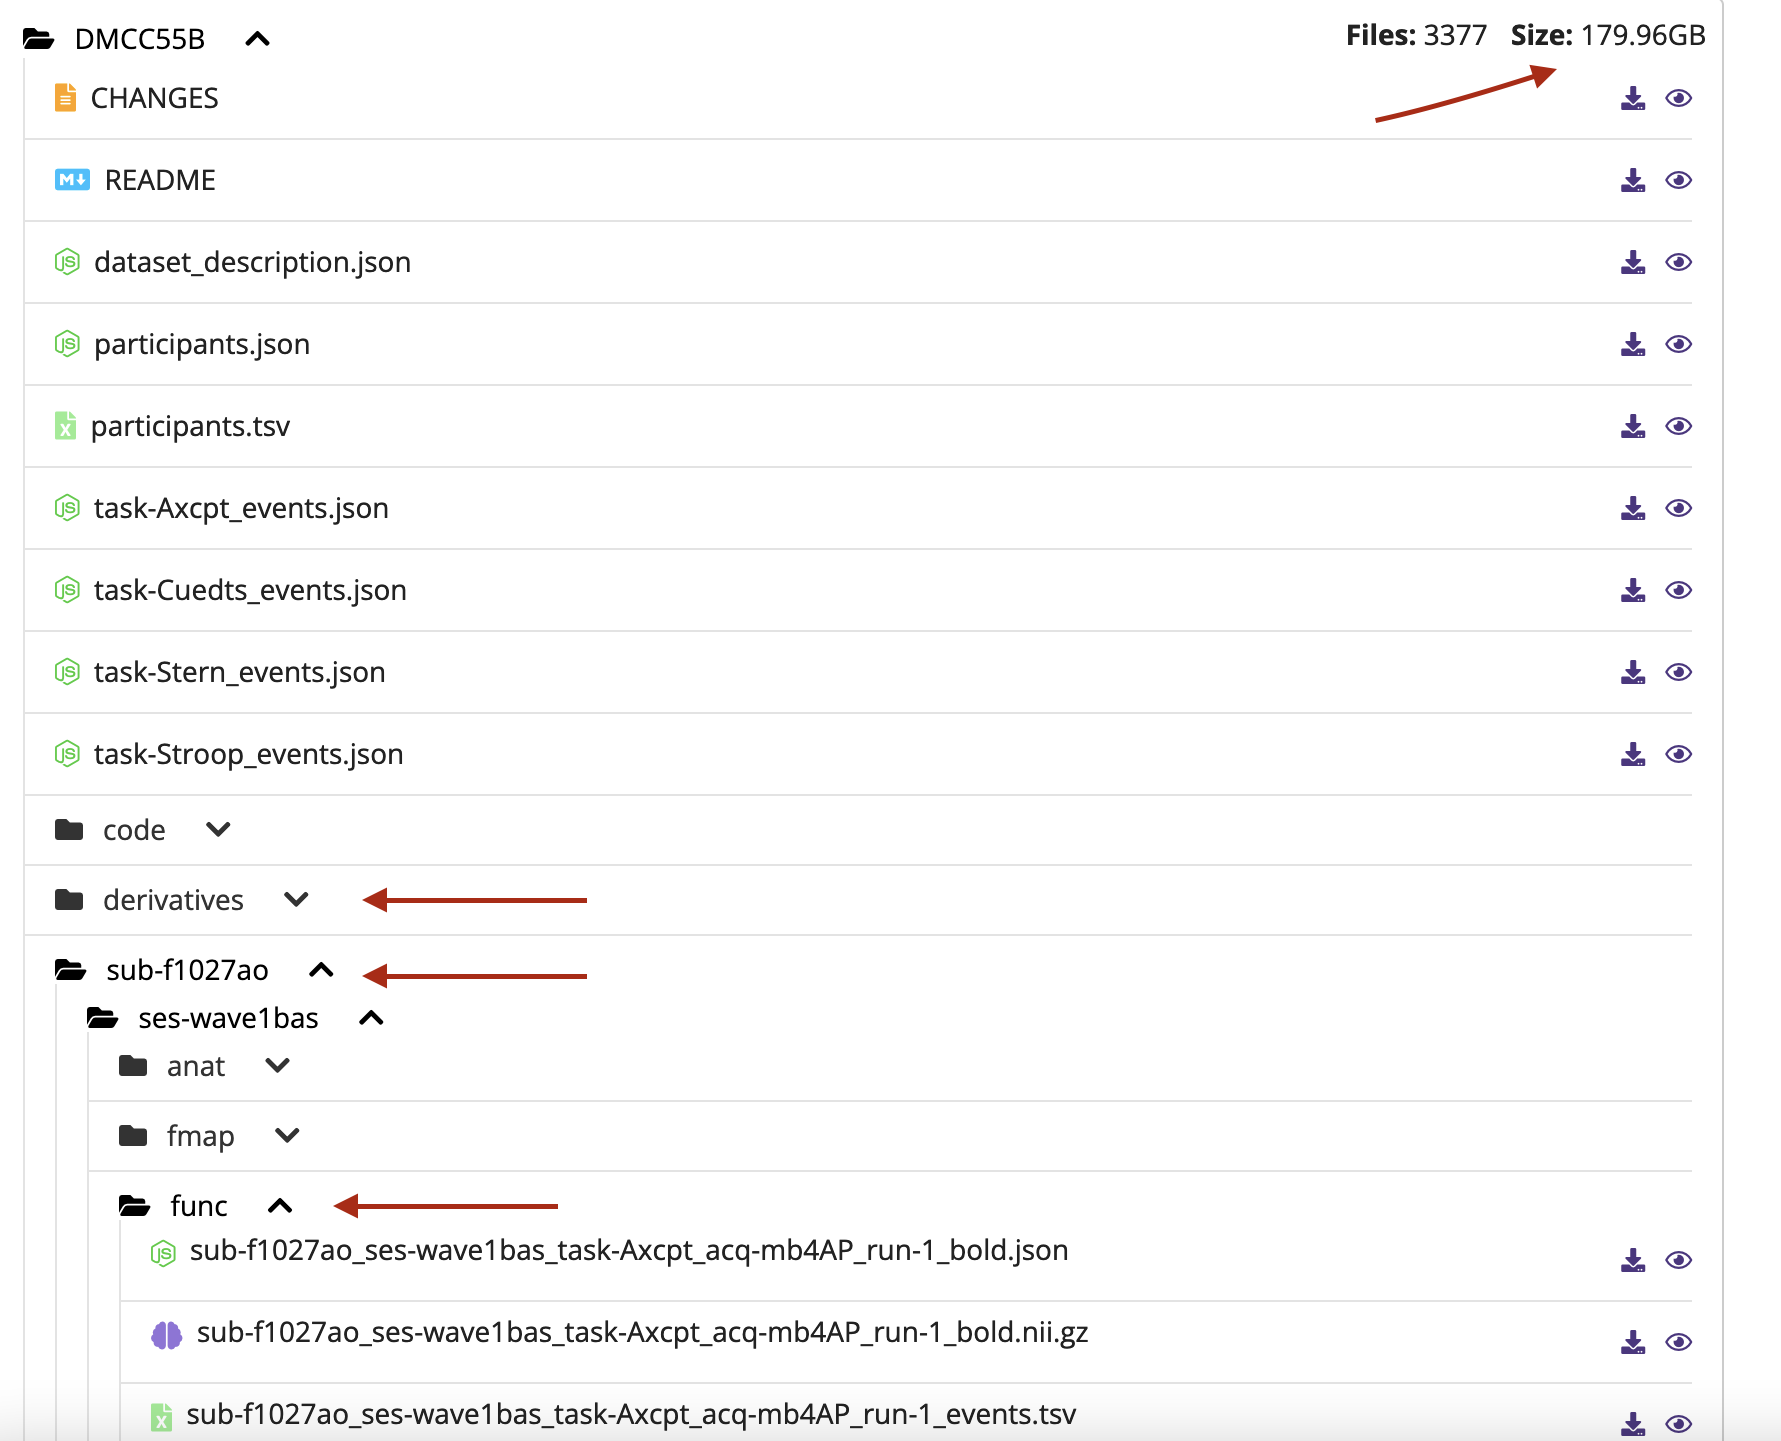

In terms of images, we need to navigate to the **derivatives** folder since we want to download the pre-processed data instead of raw data. In this dataset, all the MRI images were preprocessed by using [fMRIPrep](https://fmriprep.org/en/stable/), thus we need to go to sub-folder named "fmriprep-1.3.2". Within this sub-folder, all the preprocessed data were organized by subject ID again, and we need to go to that subject's folder ("sub-f1027ao"). in the subject folder, we want to download 2 types of files : the preprocessed images wih "desc-preproc_bold.nii.gz" as suffix and confound regressors file with "desc-confounds_regressors.tsv" as suffix. Again, we only need Stroop task related files with "task-Stroop" in their names. Please locate these files and download them on your own laptop. Please note the downloading functional images could take some time since the image file of each functional run can be around 500 MB.

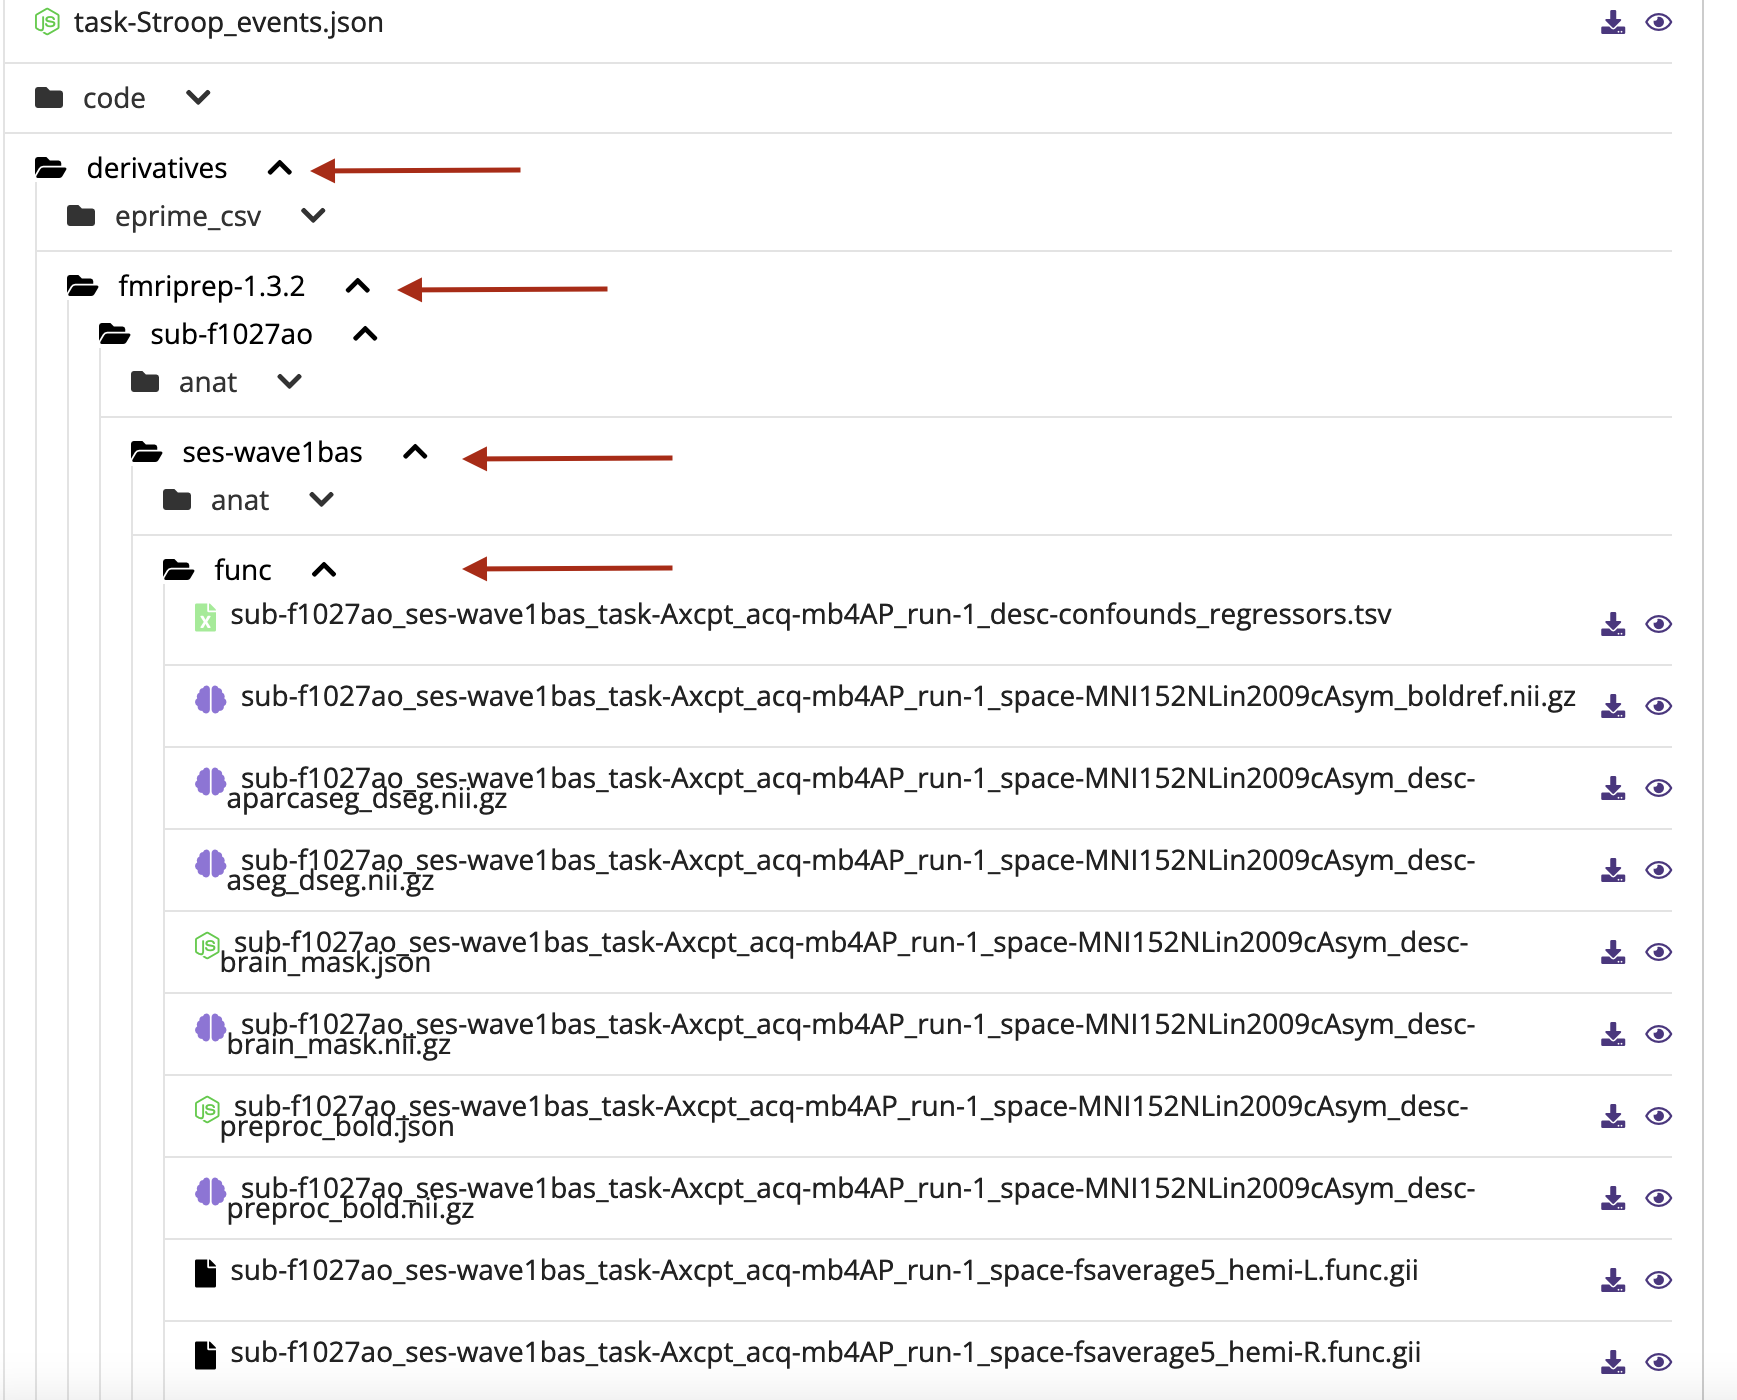

# Part 2: Importing and exploring fMRI images
*Created by Mengqiao Chai, Department of Experimental Psychology, Ghent University*

In this tutorial, you will learn how to import and visually examine MRI images in the python environment using the [nilearn](https://nilearn.github.io/stable/index.html) Python package. And we will be using the data we just downloaded in **Part 1**. Please note that this tutorial is heavily inspired by the online course from [NI-edu](https://lukas-snoek.com/NI-edu/index.html), which is an awesome resource to learn fMRI experimentation and analysis in the Python environment.

#### Required packages:
In addition to some general packages, such as **os** and **numpy**, the package we will be using extensively is **nilearn** specifically for the MRI image processing. so if you have not installed it yet, please use the command `!pip install nilearn` in a notebook cell, or use the command `pip install nilearn` directly in a Python Console.

In [3]:
import os
import numpy as np
from nilearn import image

First of all, let's define the folder of the data and the name of the data. So here please specify your folder path that the data was downloaded into

In [4]:
data_dir = "/Users/mengqiao/Documents/Teaching/Analysis_NeuroImaging/example_data/DMCC55B/sub-f1027ao"
image_name = "sub-f1027ao_ses-wave1bas_task-Stroop_acq-mb4AP_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
image_path = os.path.join(data_dir, image_name)

## Data importing
So, now we have defined the full path of the image that we want to import and examine. For the following step, we will use the **image** module from the **nilearn** package to import these functional images by using the **load_img** command. Depends on the size of the images, this command might take a bit time. Since we are loading 4 dimensional functional images from an experimental run, so the data is relatively large. 

In [5]:
image_4d = image.load_img(image_path)

Looks like we successfully import the images, Hooray! Let's see what these images' data type is

In [6]:
print(type(image_4d))

<class 'nibabel.nifti1.Nifti1Image'>


As you can see, the data is in [nifti](https://nifti.nimh.nih.gov/) format, which is the most common image format in fMRI analysis. It is also the standard way of sharing data in neuroimaging research. So when you see a file with 'nii' or 'nii.gz' suffix, you can already tell that it is in the nifti format.

Importantly, each nifti image has 3 components: data, affine, and header. Generally, we only need the data component to run the analysis. However, the affine and header components store important metadata that will become important when we want to manipulate images. Here, I won't extend on this, but keep in mind that you can always access these information from the nifti image, such as the affine information shown below.

In [7]:
print(image_4d.affine)

[[   2.4000001    0.           0.         -96.       ]
 [   0.           2.4000001    0.        -132.       ]
 [   0.           0.           2.4000001  -78.       ]
 [   0.           0.           0.           1.       ]]


As I said, the images have 4 dimensions, and let's examine this by printing the shape attribute of the file:

In [8]:
print(image_4d.shape)

(81, 96, 81, 540)


Here you can see the images are indeed organized in 4 dimensions. The first 3 dimensions are spatial dimensions that define our brain anatomy since the brain is an 3-dimensional organ. The 4th dimension denotes the number of volumes that we acquired during the functional scan. One volumne includes the signals from all the voxels of the brain at one scanning timepoint(also know as 1 TR). And since we scaned the brain non-stop during a functional run, here we can see that across the whole functional run, we acquired 540 volumns. See the following picture as a way to visualize the organization of the images in the 4d file.

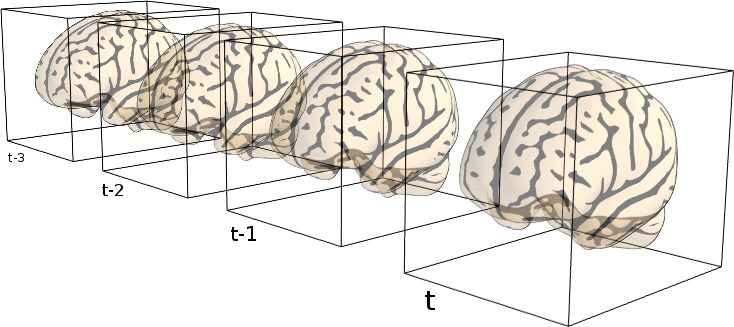

## Data visualization
so far, we successfully imported the data, but since they are images, it would be nice to visualize the image. To this end, we will use the **plotting** module from the nilearn package and ask **matplotlib** to show the figure inside the notebook:

In [9]:
from nilearn import plotting
%matplotlib inline

Please keep in the mind that so far, the nifti image that we imported here is a 4D image, which is difficult to visualize itself. However, what we can do is to select one volume from the 4D image and plot this volumn. Let's try that now. First, we will only select the 3rd volume (index is 2 in python since python start index from zero) by using the **index_img** command from the image module:

In [10]:
selected_img = image.index_img(image_4d, 2)

And let's check the dimension of the this selected image:

In [11]:
print(selected_img.shape)

(81, 96, 81)


Looks good! now we have a 3D image that we can plot now, to do this, we will leverage on the **plotting** module from nilearn package, and we will use the **plot_anat** function to visualize the raw fMRI image (in comparison to the statistical map derived from fMRI analysis):

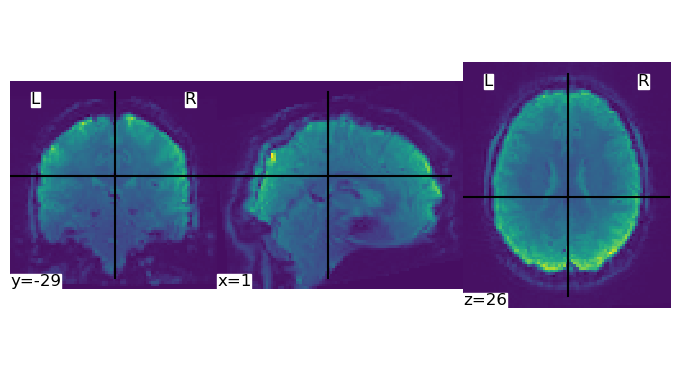

In [12]:
display = plotting.plot_img(selected_img)

Ta-da! here it is, our first brain image. As you can see, the image is displayed in 3 directions:coronal, sagittal, and axial. the function of **plot_img** is very flexible, and you can specify various arguments to make the plot the way you want, please see more information about this [plotting function](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_img.html#nilearn.plotting.plot_img) to learn more about it. 

Another feature you might already noticed is that the resolution of the image is not very high, which is also very common in functional images. Since in fMRI data acquisition, we have to sacrifice spatial resolution to some extend in exchange for faster image acquisition in order to capture the temporal dynamics of BOLD signal. In comparison, the T1 anatomical images that we also acquired during the scanning session have a much better spatial resolution. For the next **To-do** task, you will see how different they can be.

<div class="alert alert-info"><b>To-do:</b> <p>Please download an anatomical image from either the same or different public data repository and visualize the anatomical image using the <b>plot_anat</b> function from the same image module, hopefully you can immediately see the resolution improvement compared to functional images</p></div>

Moreover, you can also slice multiple volumes by using the **index_img** function, and plot them one-by-one in a for-loop:

In [13]:
selected_imgs = image.index_img(image_4d, slice(2, 6))

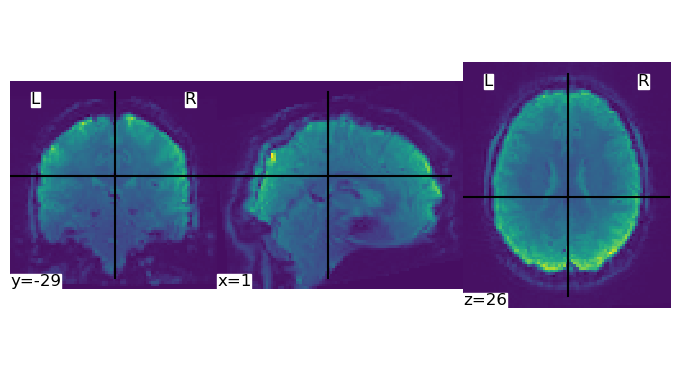

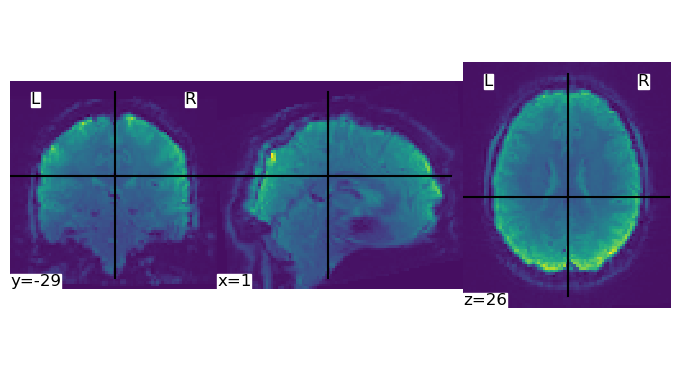

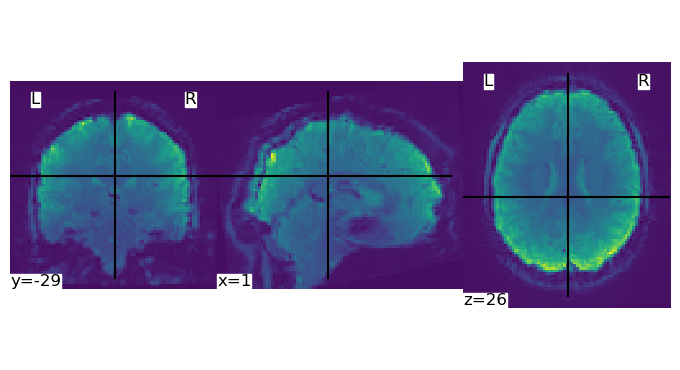

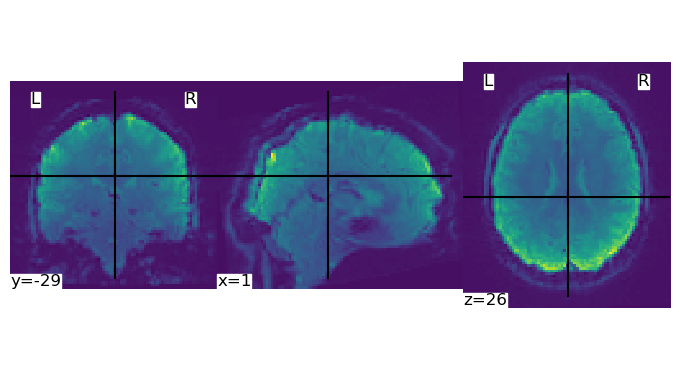

In [14]:
for img in image.iter_img(selected_imgs):
    plotting.plot_img(img)

In general, the plotting function and quality in python are quite limited in terms of fMRI images. Other softwares, such as [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki), [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/), and [Workbench](https://www.humanconnectome.org/software/connectome-workbench) have more advanced plotting set-ups. For example, by using [FSLeyes](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FSLeyes) of FSL, you can view the 4D images volumne by volumne in a movie mode, so it comes very handy if you want to scroll through images to check the image quality or large movements. Installing and using these softwares are beyond the scope of this tutorial, but there are very good learning resources on their websites, feel free to explore! 